# Model development using baseline models for classification and regression

Define the problem: In this example, we are going to predict whether a patient has heart disease.

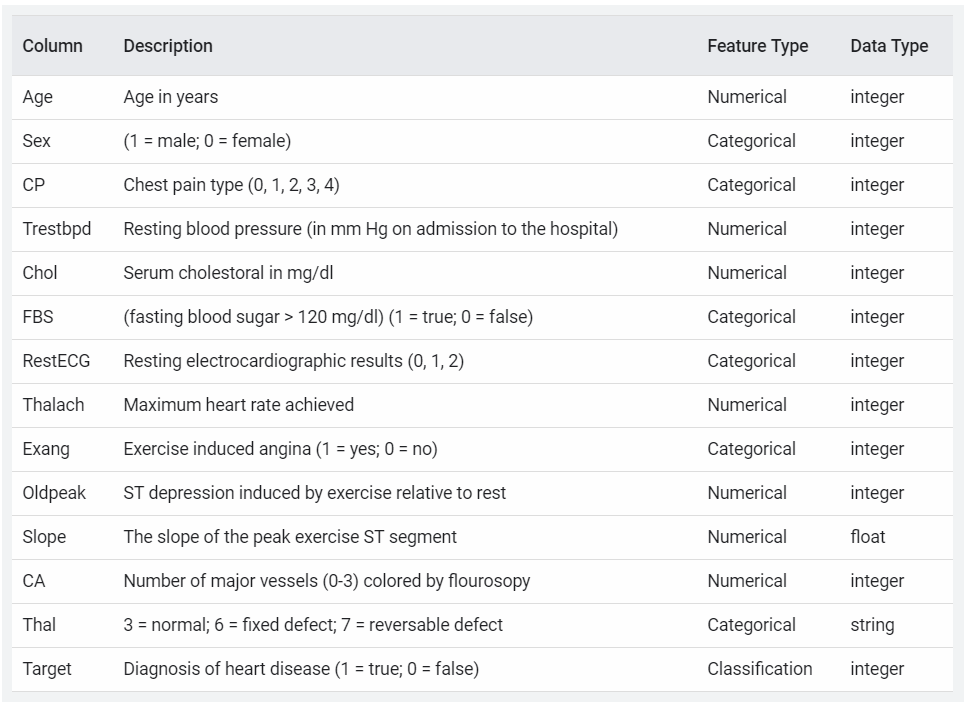

In [1]:
# import stuff
import pandas as pd
from sklearn.model_selection import train_test_split

Let's load some data.

In [2]:
# read csv into pandas
dataframe = pd.read_csv('heart.csv')
print('dataframe.shape = {}'.format(dataframe.shape))
dataframe.head(10)

dataframe.shape = (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,normal,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,normal,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,normal,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,reversible,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,reversible,0


Some data preprocessing - feel free to explore further yourself

In [3]:
# Summary Statistics
print("\nSummary Statistics:")
dataframe.describe(include='all')


Summary Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168,NaN
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,NaN,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,NaN,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,NaN,1.000000


In [4]:
# categorical data
onehot_cols = ['cp', 'restecg', 'thal']
dataframe = pd.get_dummies(dataframe, columns=onehot_cols, dtype=float)
dataframe.head(5)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,cp_3,cp_4,restecg_0,restecg_1,restecg_2,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible
0,63,1,145,233,1,150,0,2.3,3,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,67,1,160,286,0,108,1,1.5,2,3,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,67,1,120,229,0,129,1,2.6,2,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,37,1,130,250,0,187,0,3.5,3,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,41,0,130,204,0,172,0,1.4,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
print(dataframe.columns)


Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'cp_4',
       'restecg_0', 'restecg_1', 'restecg_2', 'thal_1', 'thal_2', 'thal_fixed',
       'thal_normal', 'thal_reversible'],
      dtype='object')


# Model development

Note that the outcome is imbalanced. 27.4% of the samples have heart disease.

In [6]:
# split the dataframe into train, test
train, test = train_test_split(dataframe, test_size=0.2, random_state=42, stratify=dataframe['target'])
print(len(train), 'train examples')
print(len(test), 'test examples')

242 train examples
61 test examples


In [7]:
# Check class distribution
target_counts = dataframe['target'].value_counts()

# Calculate percentages
target_percentages = (target_counts / len(dataframe)) * 100

# Display counts and percentages
print(target_counts)
print(target_percentages)

target
0    220
1     83
Name: count, dtype: int64
target
0    72.607261
1    27.392739
Name: count, dtype: float64


Let's develop a baseline model using logistic regression

First, let's develop the model without rescaling the data.

In [10]:
train_features = train.drop('target', axis=1).to_numpy()
train_labels = train['target'].to_numpy()
test_features = test.drop('target', axis=1).to_numpy()
test_labels = test['target'].to_numpy()

In [12]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=42).fit(train_features, train_labels)
pred = model.predict(test_features)

print('Accuracy =', accuracy_score(test_labels, pred))

Accuracy = 0.8360655737704918


C:\Users\Admin\.vscode\Anaconda new\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


You may see a warning: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

This is because without rescaling the predictors, it is hard for the model to be trained

In [13]:
# Predict probabilities and calculate AUC

from sklearn.metrics import roc_auc_score

pred_proba = model.predict_proba(test_features)[:, 1]
auc_score = roc_auc_score(test_labels, pred_proba)

auc_score

0.9411764705882353

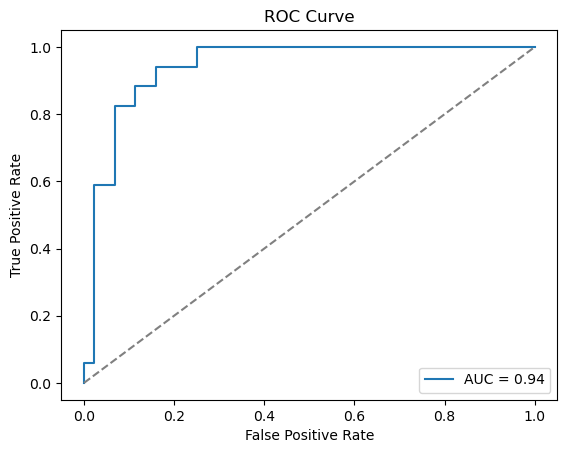

In [14]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Let's rescale the data this time.

In [15]:
# standardisation
from sklearn.preprocessing import StandardScaler

train_features = train.drop('target', axis=1).to_numpy()
train_labels = train['target'].to_numpy()
test_features = test.drop('target', axis=1).to_numpy()
test_labels = test['target'].to_numpy()

scaler = StandardScaler()
scaler.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

Think about why we "fit" train_features only, and use the statistics of train_features to "transform" test features. \
Hint: Google data leakage or visit https://machinelearningmastery.com/data-preparation-without-data-leakage/

In [16]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=42).fit(train_features, train_labels)
pred = model.predict(test_features)

print('Accuracy =', accuracy_score(test_labels, pred))

Accuracy = 0.8524590163934426


In [17]:
# Predict probabilities and calculate AUC

from sklearn.metrics import roc_auc_score

pred_proba = model.predict_proba(test_features)[:, 1]
auc_score = roc_auc_score(test_labels, pred_proba)

auc_score

0.9411764705882353

Now you can see the model can converge

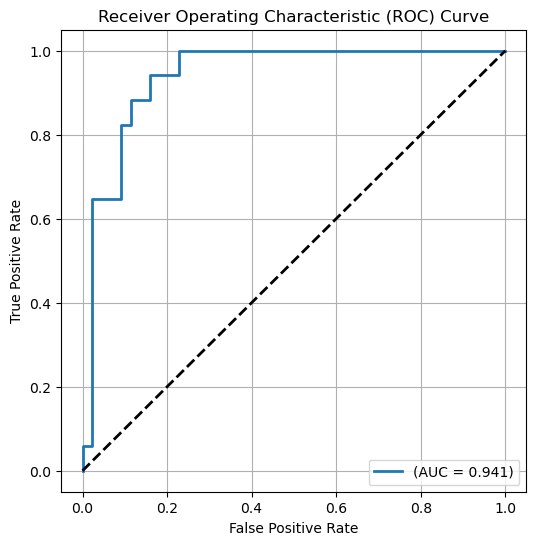

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute the ROC curve
fpr, tpr, _ = roc_curve(test_labels, pred_proba)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'(AUC = {auc_score:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Let's try random forest.

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create and train Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)
rf_model.fit(train_features, train_labels)

# Predict probabilities and calculate AUC
rf_test_pred_proba = rf_model.predict_proba(test_features)[:, 1]
rf_auc_score = roc_auc_score(test_labels, rf_test_pred_proba)

rf_auc_score

0.9004010695187166

You may notice that the performance is worse than that of logistic regression. This is because the more complex a model is, the harder it is to train. Now, let's try to improve the model.

Let's do some hyper parameter tuning

In [20]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(train_features, train_labels)

# Get best parameters and best model
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict probabilities and calculate AUC using best model
best_rf_test_pred_proba = best_rf_model.predict_proba(test_features)[:, 1]
best_rf_auc_score = roc_auc_score(test_labels, best_rf_test_pred_proba)

best_params, best_rf_auc_score

Fitting 5 folds for each of 24 candidates, totalling 120 fits


({'bootstrap': True, 'max_depth': None, 'n_estimators': 50},
 0.9418449197860962)

You can see the performance of the model increased slightly. Note, we are using AUROC to track the performance of the model with different hyper parameter combos.

# Practice

1. Try to develop some other models using sklearn and do some hyper parameter tuning.

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Initialize Logistic Regression
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Hyperparameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],           # Regularization strength
    'penalty': ['l1', 'l2']            # L1 (Lasso) and L2 (Ridge) regularization
}

# Grid Search
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid_search_lr.fit(train_features, train_labels)

# Evaluation
best_lr = grid_search_lr.best_estimator_
lr_proba = best_lr.predict_proba(test_features)[:, 1]
lr_auc = roc_auc_score(test_labels, lr_proba)

print("Logistic Regression Best Params:", grid_search_lr.best_params_)
print("Logistic Regression ROC-AUC Score:", lr_auc)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Logistic Regression Best Params: {'C': 0.1, 'penalty': 'l1'}
Logistic Regression ROC-AUC Score: 0.9358288770053476


## SMV

In [25]:
from sklearn.svm import SVC

# Initialize SVM
svm_model = SVC(probability=True, random_state=42)

# Hyperparameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],                 # Regularization parameter
    'kernel': ['linear', 'rbf'],        # Kernel type
    'gamma': ['scale', 'auto']          # Kernel coefficient
}

# Grid Search
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid_search_svm.fit(train_features, train_labels)

# Evaluation
best_svm = grid_search_svm.best_estimator_
svm_proba = best_svm.predict_proba(test_features)[:, 1]
svm_auc = roc_auc_score(test_labels, svm_proba)

print("SVM Best Params:", grid_search_svm.best_params_)
print("SVM ROC-AUC Score:", svm_auc)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVM Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM ROC-AUC Score: 0.9545454545454546


## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN
knn_model = KNeighborsClassifier()

# Hyperparameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],       # Number of neighbors
    'weights': ['uniform', 'distance'], # Weight function
    'metric': ['euclidean', 'manhattan'] # Distance metric
}

# Grid Search
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid_search_knn.fit(train_features, train_labels)

# Evaluation
best_knn = grid_search_knn.best_estimator_
knn_proba = best_knn.predict_proba(test_features)[:, 1]
knn_auc = roc_auc_score(test_labels, knn_proba)

print("KNN Best Params:", grid_search_knn.best_params_)
print("KNN ROC-AUC Score:", knn_auc)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
KNN Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
KNN ROC-AUC Score: 0.9211229946524064


In [27]:
# Comparing AUC Scores
print("\nModel Performance Summary:")
print(f"Logistic Regression AUC: {lr_auc}")
print(f"SVM AUC: {svm_auc}")
print(f"KNN AUC: {knn_auc}")



Model Performance Summary:
Logistic Regression AUC: 0.9358288770053476
SVM AUC: 0.9545454545454546
KNN AUC: 0.9211229946524064


2. Try to develop an XGBoost model and tune the hyper parameters. You may need to use "pip install xgboost"\
   Hint: use "from xgboost import XGBClassifier" to load the model

In [23]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the model on the training data
grid_search.fit(train_features, train_labels)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Predict probabilities and calculate AUC on the test set
best_xgb_test_pred_proba = best_xgb_model.predict_proba(test_features)[:, 1]
best_xgb_auc_score = roc_auc_score(test_labels, best_xgb_test_pred_proba)

# Display the best parameters and AUC score
print("Best Hyperparameters:", best_params)
print("Best ROC-AUC Score:", best_xgb_auc_score)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best ROC-AUC Score: 0.9411764705882353


3. Try to develop a regression model to predict resting blood pressure "trestbps".\
   Hint: You will need other evaluation metrics to track the performance of the model with different hyper parameter combos.

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'dataframe' is your dataset
# Features and target
X = dataframe.drop('trestbps', axis=1)
y = dataframe['trestbps']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1️⃣ Linear Regression (Baseline Model)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
lin_preds = lin_reg.predict(X_test)

# Evaluation Metrics
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

lin_mae, lin_mse, lin_r2 = evaluate_model(y_test, lin_preds)

# 2️⃣ Random Forest Regressor with Hyperparameter Tuning
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
rf_preds = best_rf.predict(X_test)
rf_mae, rf_mse, rf_r2 = evaluate_model(y_test, rf_preds)

# 3️⃣ XGBoost Regressor with Hyperparameter Tuning
xgb = XGBRegressor(random_state=42, eval_metric='rmse')
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

best_xgb = grid_search_xgb.best_estimator_
xgb_preds = best_xgb.predict(X_test)
xgb_mae, xgb_mse, xgb_r2 = evaluate_model(y_test, xgb_preds)

# 4️⃣ Compare Model Performances
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [lin_mae, rf_mae, xgb_mae],
    'MSE': [lin_mse, rf_mse, xgb_mse],
    'R-squared': [lin_r2, rf_r2, xgb_r2]
})

print(results)

# Display best hyperparameters
print("Random Forest Best Params:", grid_search_rf.best_params_)
print("XGBoost Best Params:", grid_search_xgb.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
               Model        MAE         MSE  R-squared
0  Linear Regression  16.525923  455.869981  -0.647119
1      Random Forest  14.224316  291.745476  -0.054115
2            XGBoost  13.652807  276.309146   0.001658
Random Forest Best Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
XGBoost Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
